In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
# Final - preprocessing libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt


# visulizations
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling, stats
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as ms
import math
import sklearn.metrics as sklm
import statsmodels.api as sm

# Model saving
import pickle

In [2]:
modelling=pd.read_csv("D:/DPA/vehiclesModelling (1).csv")

In [ ]:
modelling.drop(["age"],axis=1,inplace=True)
modelling.drop(['state'],axis=1,inplace=True)
modelling.rename(columns={'state_trans':'state'},inplace=True)

In [26]:
modelling.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,9.792556,2012.0,volkswagen,excellent,4,gas,63500.0,clean,manual,4wd,hatchback,black,west
1,9.546813,2009.0,ram,good,6,gas,120057.0,clean,automatic,4wd,pickup,silver,west
2,10.448744,2017.0,ford,excellent,6,diesel,95484.0,clean,automatic,4wd,pickup,white,west
3,9.581973,2007.0,gmc,excellent,6,gas,89340.0,clean,automatic,4wd,pickup,white,west
4,9.433564,2013.0,ford,salvage,6,gas,226031.0,clean,automatic,4wd,pickup,white,west


### Log Transformation of Price

In [4]:
modelling["price"]=np.log1p(modelling["price"])

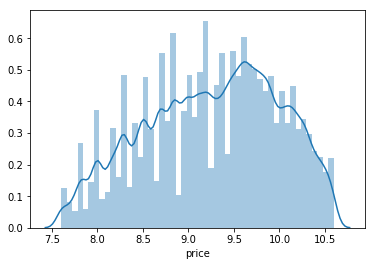

In [5]:
sns.distplot(modelling.price)

### 80-20 Splitting 

In [6]:
y=modelling["price"]
x=modelling.drop('price',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Normalization

In [7]:
x_odomin=x_train["odometer"].min()
x_odomax=x_train["odometer"].max()
x_train["odometer"]=((x_train["odometer"]-x_odomin)/(x_odomax-x_odomin))

x_test["odometer"]=((x_test["odometer"]-x_odomin)/(x_odomax-x_odomin))

x_yearmin=x_train["year"].min()
x_yearmax=x_train["year"].max()
x_train["year"]=((x_train["year"]-x_yearmin)/(x_yearmax-x_yearmin))
x_test["year"]=((x_test["year"]-x_yearmin)/(x_yearmax-x_yearmin))

C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

### Ordinal Encoding -Condition

In [8]:
condition_dict={"salvage":0,"fair":1,"good":2,"excellent":3,"like new":4}
x_train["condition"]=x_train.condition.map(condition_dict)
x_test["condition"]=x_test.condition.map(condition_dict)

C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
x_train["cylinders"].value_counts()

6     201107
4      64043
8      62270
5       1866
10      1202
3        359
12        70
Name: cylinders, dtype: int64

In [10]:
cylinder_dict={3:0,4:1,5:2,6:3,8:4,10:5,12:6}
x_train["cylinders"]=x_train.cylinders.map(cylinder_dict)
x_test["cylinders"]=x_test.cylinders.map(cylinder_dict)

C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
x_train["cylinders"].value_counts()

3    201107
1     64043
4     62270
2      1866
5      1202
0       359
6        70
Name: cylinders, dtype: int64

In [12]:
x_cylmin=x_train["cylinders"].min()
x_cylmax=x_train["cylinders"].max()
x_train["cylinders"]=((x_train["cylinders"]-x_cylmin)/(x_cylmax-x_cylmin))
x_test["cylinders"]=((x_test["cylinders"]-x_cylmin)/(x_cylmax-x_cylmin))

x_conmin=x_train["condition"].min()
x_conmax=x_train["condition"].max()
x_train["condition"]=((x_train["condition"]-x_conmin)/(x_conmax-x_conmin))
x_test["condition"]=((x_test["condition"]-x_conmin)/(x_conmax-x_conmin))


C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sukes\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [25]:
x_train.head()

,year,condition,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_midwest,state_northeast,state_south,state_west
301757,0.900000,0.75,0.166667,0.208972,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1334,0.783333,0.50,0.500000,0.478862,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
276948,0.933333,0.25,0.500000,0.489253,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
344251,0.716667,0.00,0.500000,0.592654,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
403805,0.850000,0.75,0.500000,0.310706,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### One Hot Encoding

In [15]:
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

missing_cols=set(x_train.columns)-set(x_test.columns)
for val in missing_cols:
    x_test[val]=0
    
x_test=x_test[x_train.columns]

### Selecting Random Forest for Further Analysis

### To best evaluate the model and address overfitting, we perform hyper-paramter tuning with K Fold Cross Validation

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
{'n_estimators': [10, 50, 200, 500]}
]
regressor = RandomForestRegressor(n_jobs=-1)

In [17]:
grid_search_forest = GridSearchCV(regressor, param_grid, cv=5, scoring='r2')

In [18]:
grid_search_forest.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [19]:
cvres = grid_search_forest.cv_results_

In [20]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8326587269272465 {'n_estimators': 10}
0.8433584606252079 {'n_estimators': 50}
0.845554533342572 {'n_estimators': 200}
0.8459584635657571 {'n_estimators': 500}


In [23]:
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
regressor = RandomForestRegressor(n_estimators=500, random_state=0,n_jobs=-1)
regressor.fit(x_train,y_train)
regressor.score(x_test, y_test)

0.850258140677993